WORD2VEC

In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
nltk.download('punkt')


df_train = pd.read_csv("train_emoji.csv")
df_test = pd.read_csv("tesss.csv")


def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\b[\u0600-\u06FF]+\b', '', text)
    return text

df_train['text'] = df_train['text'].apply(preprocess)
df_test['text'] = df_test['text'].apply(preprocess)


sentences_train = [nltk.word_tokenize(i) for i in df_train['text']]
sentences_test = [nltk.word_tokenize(i) for i in df_test['text']]

word2vec_model = Word2Vec(sentences_train, vector_size=100, window= 5, min_count=1, sg=1, workers=4)


def vectorize(sentence):
    words_vecs = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(10)
    return np.mean(words_vecs, axis=0)

X_train = np.array([vectorize(sentence) for sentence in sentences_train])
X_test = np.array([vectorize(sentence) for sentence in sentences_test])

X_train, y_train = shuffle(X_train, y_train, random_state=42)

y_train = to_categorical(df_train['emoji'])
y_test = to_categorical(df_test['emoji'])


model = Sequential([
    Dense(128, input_dim=100, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=13, batch_size=3, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Word2Vec Accuracy: {accuracy}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.2573 - loss: 1.6059 - val_accuracy: 0.1852 - val_loss: 1.6156
Epoch 2/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4204 - loss: 1.5839 - val_accuracy: 0.1852 - val_loss: 1.6270
Epoch 3/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3327 - loss: 1.5547 - val_accuracy: 0.1852 - val_loss: 1.6481
Epoch 4/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3221 - loss: 1.5454 - val_accuracy: 0.1852 - val_loss: 1.6774
Epoch 5/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3169 - loss: 1.5196 - val_accuracy: 0.1852 - val_loss: 1.7028
Epoch 6/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2304 - loss: 1.5752 - val_accuracy: 0.1852 - val_loss: 1.7112
Epoch 7/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2915 - loss: 1.4613 - val_accuracy: 0.1852 - val_loss: 1.7332
Epoch 8/13
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2481 - loss: 1.5574 - val_accuracy: 0.1852 - val_loss

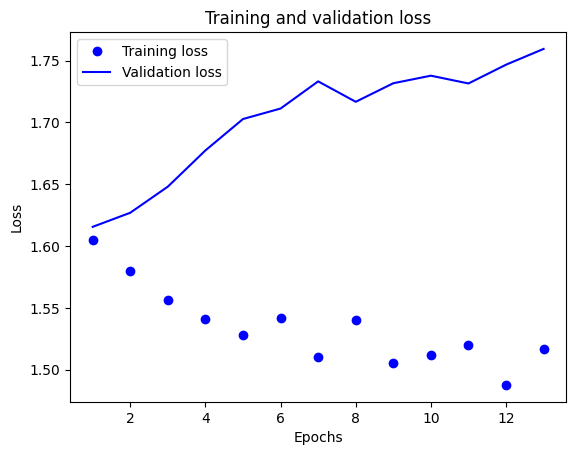

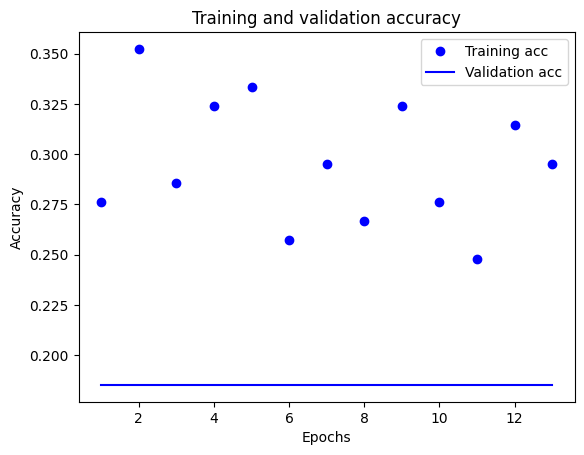

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


BOW

In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle

nltk.download('punkt')

# Load datasets
df_train = pd.read_csv("train_emoji.csv")
df_test = pd.read_csv("tesss.csv")

# Preprocess function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\b[\u0600-\u06FF]+\b', '', text)
    return text

# Apply preprocessing
df_train['text'] = df_train['text'].apply(preprocess)
df_test['text'] = df_test['text'].apply(preprocess)

# Create BoW model
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()
# print(feature_names)

# Assuming emojis are already converted to numbers
y_train = df_train['emoji']
y_test = df_test['emoji']

#wtf => this is for validation split :|
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(5, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.toarray(), y_train, epochs=10, batch_size=5 , validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predicting on new data
predictions = model.predict(X_test.toarray())
#print(predictions)


Epoch 1/10


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2377 - loss: 1.6026 - val_accuracy: 0.4444 - val_loss: 1.5644
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4461 - loss: 1.5298 - val_accuracy: 0.5556 - val_loss: 1.5285
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5215 - loss: 1.4895 - val_accuracy: 0.5556 - val_loss: 1.5019
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5652 - loss: 1.4404 - val_accuracy: 0.5926 - val_loss: 1.4644
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7241 - loss: 1.3358 - val_accuracy: 0.6296 - val_loss: 1.4168
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8233 - loss: 1.2228 - val_accuracy: 0.6667 - val_loss: 1.3626
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8146 - loss: 1.1000 - val_accuracy: 0.6667 - val_loss: 1.3060
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9227 - loss: 0.9276 - val_accuracy: 0.6296 - val_loss: 1.2504
Ep

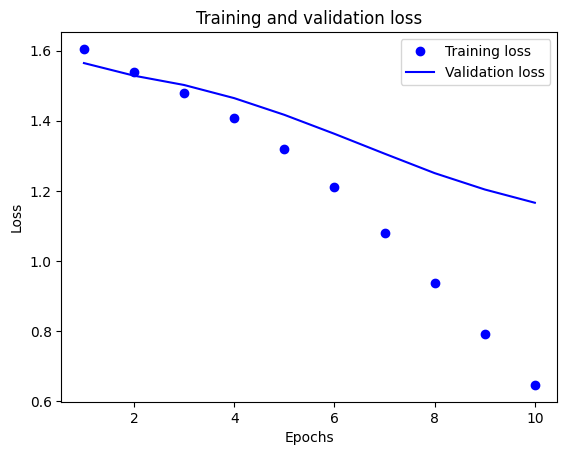

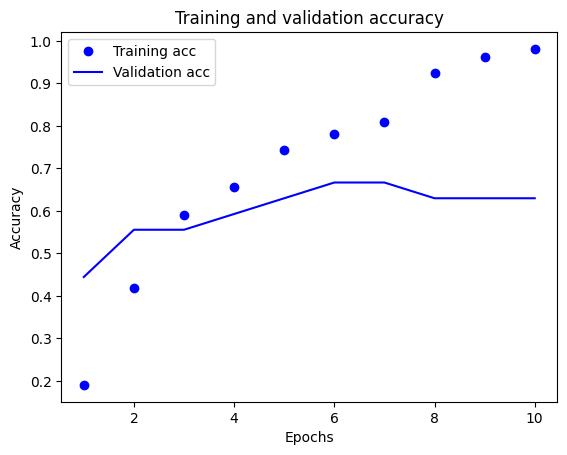

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()  # Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


GLOVE

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-06-11 07:38:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-11 07:38:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-11 07:38:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import re

train_df = pd.read_csv('train_emoji.csv')
test_df = pd.read_csv('tesss.csv')

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\b[\u0600-\u06FF]+\b', '', text)
    return text

# Apply preprocessing
train_df['text'] = train_df['text'].apply(preprocess)
test_df['text'] = test_df['text'].apply(preprocess)


tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(pd.concat([train_df['text'], test_df['text']]))
sequences_train = tokenizer.texts_to_sequences(train_df['text'])
sequences_test = tokenizer.texts_to_sequences(test_df['text'])


max_sequence_length = 100
x_train = pad_sequences(sequences_train, maxlen=max_sequence_length)
x_test = pad_sequences(sequences_test, maxlen=max_sequence_length)


y_train = train_df['emoji']
y_test = test_df['emoji']

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load GloVe embeddings
def load_glove_vectors(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_file_path = '/content/glove.6B.100d.txt'
embeddings_index = load_glove_vectors(glove_file_path)
print(f'Found {len(embeddings_index)} word vectors.')


word_index = tokenizer.word_index
embedding_dim = 100

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#### at first it was 52
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Softmax activation for multi-class classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=5, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

Found 400000 word vectors.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.2603 - loss: 1.5867 - val_accuracy: 0.1852 - val_loss: 1.6288
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.4871 - loss: 1.3060 - val_accuracy: 0.2963 - val_loss: 1.4086
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6005 - loss: 1.1598 - val_accuracy: 0.4444 - val_loss: 1.2810
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6741 - loss: 0.9445 - val_accuracy: 0.6667 - val_loss: 1.0406
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8253 - loss: 0.7166 - val_accuracy: 0.7037 - val_loss: 0.9508
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8262 - loss: 0.5695 - val_accuracy: 0.5926 - val_loss: 0.9933
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8520 - loss: 0.5477 - val_accuracy: 0.6667 - val_loss: 0.8959
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8295 - loss: 0.6010 - val_accuracy: 0.7407 - val_loss: 

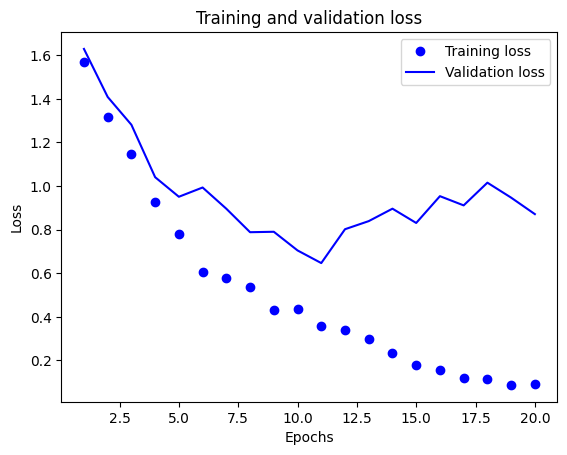

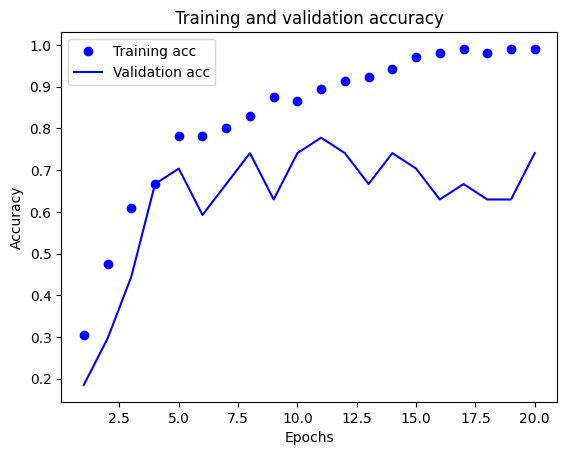

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


BERT(GOOGLE ALGORITHM))

In [ ]:
pip install tensorflow tensorflow-hub tensorflow-text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing inst

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM

train_df = pd.read_csv('train_emoji.csv')
test_df = pd.read_csv('tesss.csv')

# def preprocess(text):
#     text = text.lower()
#     text = re.sub(r'[^\w\s]', '', text)
#     text = re.sub(r'\d', '', text)
#     text = re.sub(r'\b[\u0600-\u06FF]+\b', '', text)
#     return text


# df_train['text'] = df_train['text'].apply(preprocess)
# df_test['text'] = df_test['text'].apply(preprocess)

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/2")


In [ ]:
from sklearn.utils import shuffle

def preprocess_and_extract(texts):
    preprocessed_text = bert_preprocess(texts)
    embeddings = bert_encoder(preprocessed_text)['pooled_output']
    return embeddings

# Extract embeddings for the training and testing data
x_train = preprocess_and_extract(train_df['text'].tolist())
x_test = preprocess_and_extract(test_df['text'].tolist())

y_train = train_df['emoji']
y_test  = test_df['emoji']
print(x_train, x_test)


tf.Tensor(
[[ 0.58697486 -0.29781252 -0.9996219  ...  0.37888607  0.33970276
   0.5925272 ]
 [-0.22763163 -0.4208349  -0.99999917 ... -0.09260731  0.27310732
   0.2072319 ]
 [ 0.6934324  -0.5469939  -0.99994355 ...  0.43014628  0.40830937
   0.4242466 ]
 ...
 [ 0.27967247 -0.38192186 -0.99998224 ...  0.5834778   0.41691527
   0.38299972]
 [ 0.5700175  -0.25808918 -0.9999832  ...  0.37410876  0.5745799
   0.5071753 ]
 [ 0.28613284  0.01112828 -0.9996928  ...  0.04090552 -0.17647552
   0.01113256]], shape=(132, 512), dtype=float32) tf.Tensor(
[[-0.10323283  0.2810634  -0.99995774 ...  0.05899489 -0.41282973
  -0.4731225 ]
 [ 0.36817062 -0.0468651  -0.99997824 ...  0.50577426  0.47000754
   0.15856756]
 [ 0.08458953  0.19954967 -0.99998933 ...  0.11049424 -0.25754374
   0.35598025]
 ...
 [ 0.49451062 -0.03326582 -0.9998917  ...  0.04026362 -0.20690393
   0.5919405 ]
 [ 0.03562035 -0.05684759 -0.99998283 ...  0.05044873  0.18123378
   0.26194534]
 [ 0.3795874  -0.3163209  -0.9999921  ...  

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
    ])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=5, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2197 - loss: 2.0187 - val_accuracy: 0.2593 - val_loss: 1.5554
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3875 - loss: 1.4156 - val_accuracy: 0.2963 - val_loss: 1.5680
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3583 - loss: 1.4323 - val_accuracy: 0.4074 - val_loss: 1.3796
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4215 - loss: 1.2434 - val_accuracy: 0.4815 - val_loss: 1.3549
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5122 - loss: 1.1743 - val_accuracy: 0.5185 - val_loss: 1.3818
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5320 - loss: 1.1658 - val_accuracy: 0.5556 - val_loss: 1.3790
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5236 - loss: 1.1985 - val_accuracy: 0.5185 - val_loss: 1.1962
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5825 - loss: 1.0774 - val_accuracy: 0.5556 - val_loss: 1.1725
Ep

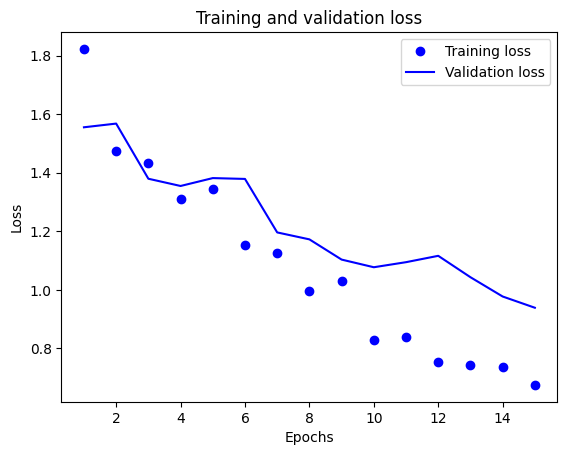

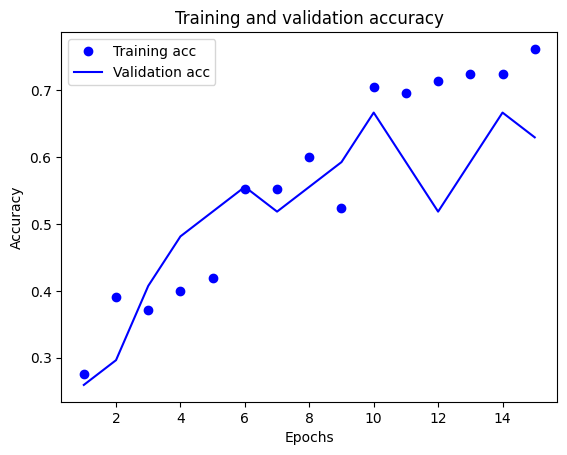

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

multihot encoding(MULTILABEL BINEIER)

In [ ]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout


train_df = pd.read_csv('train_emoji.csv')
test_df = pd.read_csv('tesss.csv')

mlb = MultiLabelBinarizer()

x_train = mlb.fit_transform(train_df['text'])
x_test = mlb.transform(test_df['text'])
y_train = train_df['emoji']
y_test = test_df['emoji']

model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=5, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3038 - loss: 1.5437 - val_accuracy: 0.2593 - val_loss: 1.6935
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4358 - loss: 1.4712 - val_accuracy: 0.2963 - val_loss: 1.6406
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4199 - loss: 1.3872 - val_accuracy: 0.3704 - val_loss: 1.6689
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4872 - loss: 1.3974 - val_accuracy: 0.3333 - val_loss: 1.6173
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3664 - loss: 1.4324 - val_accuracy: 0.3704 - val_loss: 1.6507
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3596 - loss: 1.4648 - val_accuracy: 0.3704 - val_loss: 1.6301
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3934 - loss: 1.3773 - val_accuracy: 0.3333 - val_loss: 1.5709
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4657 - loss: 1.4616 - val_accuracy: 0.3333 - val_loss: 1.5617
Ep

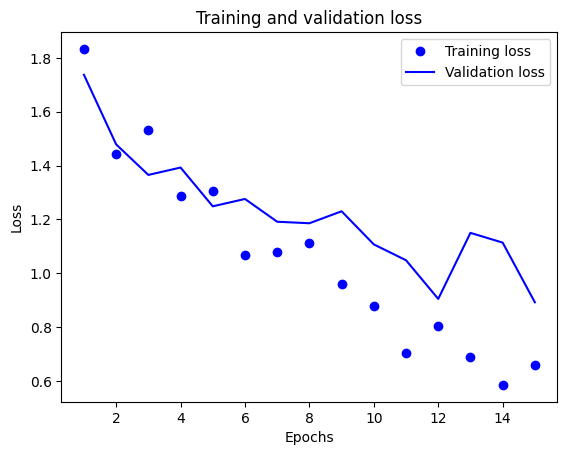

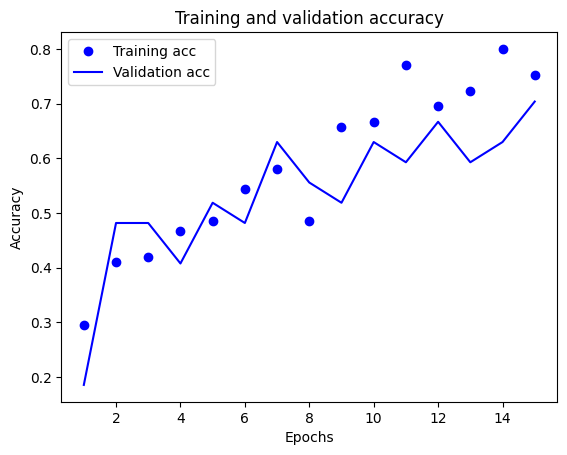

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
